## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")

In [4]:
data.shape

(1000, 21)

In [17]:
data.select_dtypes(include=['object'])

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,all credits at this bank paid back duly,car (used),unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,no credits taken/all credits paid back duly,retraining,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,no credits taken/all credits paid back duly,furniture/equipment,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,>= 7 yrs,unknown / no property,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,no credits taken/all credits paid back duly,others,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,< 1 yr,unknown / no property,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,all credits at this bank paid back duly,others,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,>= 7 yrs,real estate,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,no credits taken/all credits paid back duly,furniture/equipment,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,< 1 yr,real estate,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [16]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [139]:
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

- Пропусков нет

### Признаки
- status-порядковый
- duration-колличественный
- credit_history-порядковый
- purpose-категориальный
- amount-количественные
- savings-порядковый
- employment_duration-порядковый
- installment_rate-порядковый
- personal_status_sex-категориальные
- other_debtors-категориальные
- present_residence-порядковый
- property-категориальные
- age-количественные
- other_installment_plans-категориальные
- housing-категориальные
- number_credits-порядковый
- job-порядковый
- people_liable-порядковый
- telephone-бинарный
- foreign_worker-бинарный
- credit_risk-бинарный


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [140]:
data[['amount', 'purpose']].groupby(by='purpose').mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [141]:
df1=data[(data.age<30)]
df2=data[(data.housing=='rent') & (data.age<30)]
print(f'Процент клиентов, снимающих жилье, которым меньше 30: {round(df2.shape[0]/df1.shape[0]*100, 2)}%')
df1=data[(data.age>40)]
df2=data[(data.housing=='rent') & (data.age>40)]
print(f'\n\nПроцент клиентов, снимающих жилье, которым больше 40: {round(df2.shape[0]/df1.shape[0]*100, 2)}%')

Процент клиентов, снимающих жилье, которым меньше 30: 66.67%


Процент клиентов, снимающих жилье, которым больше 40: 68.01%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [142]:
df1=data[(data.foreign_worker=='yes')]
df1.loc[df1.foreign_worker=='yes',  'foreign_worker'] = 1
df1[['foreign_worker', 'number_credits']].groupby(by='number_credits').sum()

,foreign_worker
number_credits,
1,25
2-3,11
4-5,1


- Вывод: Иностранцев у которых больше 3 кредитов: 1

### Задание 6 (1 балл)

In [143]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

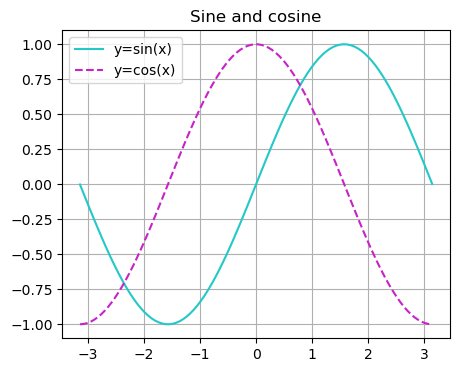

In [160]:
x = np.linspace(-3.14, 3.14, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.figure(figsize=(5,4))
plt.grid()
plt.plot(x, y1, label = 'y=sin(x)', color='#24c8c7')
plt.plot(x, y2, linestyle = '--', label = 'y=cos(x)', color='#c723c7')
plt.legend()
plt.title('Sine and cosine')
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [145]:
df1=data[data.credit_risk=='good']
df1.loc[df1.credit_risk=='good',  'credit_risk'] = 1

df2=data[data.credit_risk=='bad']
df2.loc[df2.credit_risk=='bad',  'credit_risk'] = 1

Text(0.513, 0.04, 'Count')

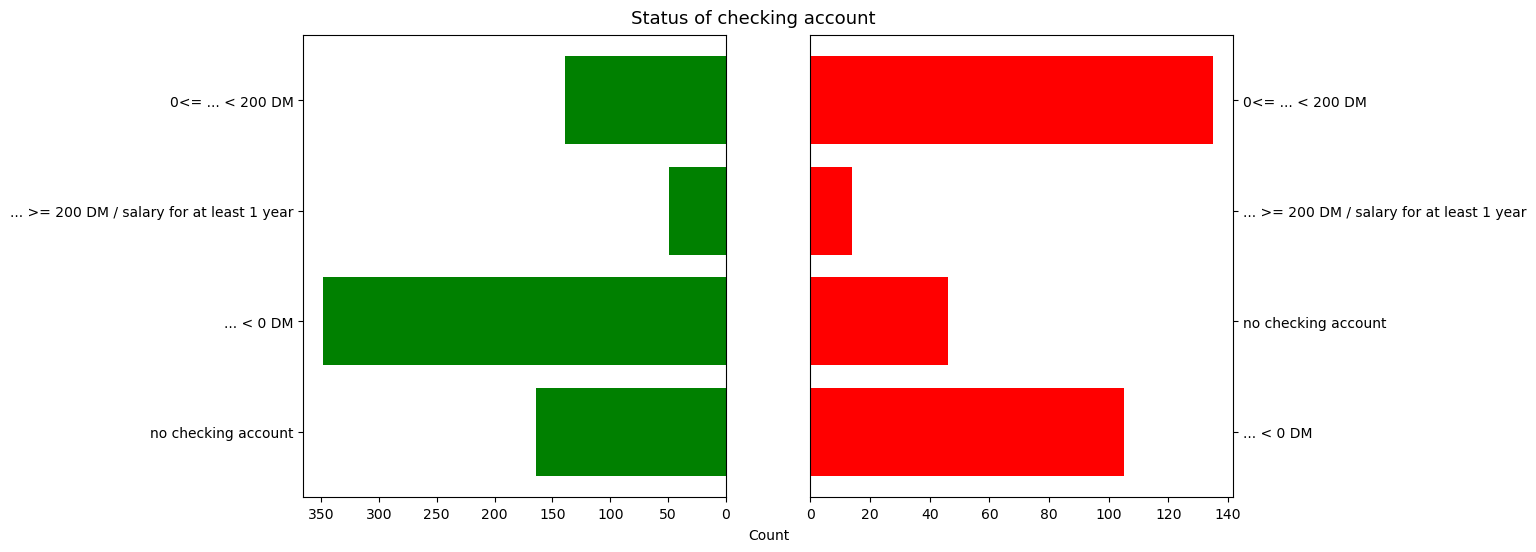

In [146]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
plt.figtext(.5,.9,"Status of checking account", fontsize=13, ha='center')
axes[0].barh(df1.status.unique(), df1.groupby('status')['credit_risk'].sum(), color='g')
axes[0].invert_xaxis()
axes[1].barh(df2.status.unique(), df2.groupby('status')['credit_risk'].sum(), color='r')
axes[1].yaxis.tick_right()
fig.text(0.513, 0.04, 'Count', ha='center')

- Слева (зеленым цветом) указан статус счета людей с хорошим кредитным риском и из графа видно, что преобладает статус "... < 0 DM", и это интересно что у этих людей отстутсвуют деньги на расчетном счете, в то время как у людей с плохим кридитным риском преобладают люди у которых диапозон хранимых средств от 0 до 200

### Задание 8  (0.5 балла)

In [147]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

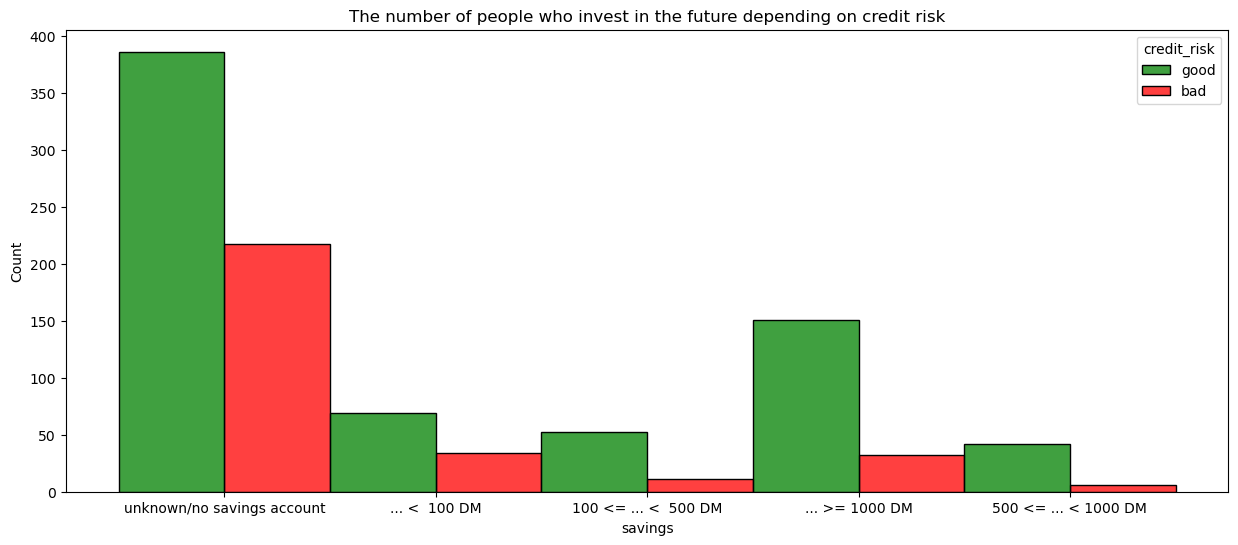

In [148]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=data, x="savings", hue="credit_risk", multiple="dodge", palette=['g', 'r'])
plt.title('The number of people who invest in the future depending on credit risk')
plt.show()

- Этот способ мне нравится больше, так как удобнее сравнивать категории. И его трудоемкость ниже

- из этой гистограммы видно что люди с хорошим кредитным риском больше инвестируют и это наблюдается во всех категориях

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

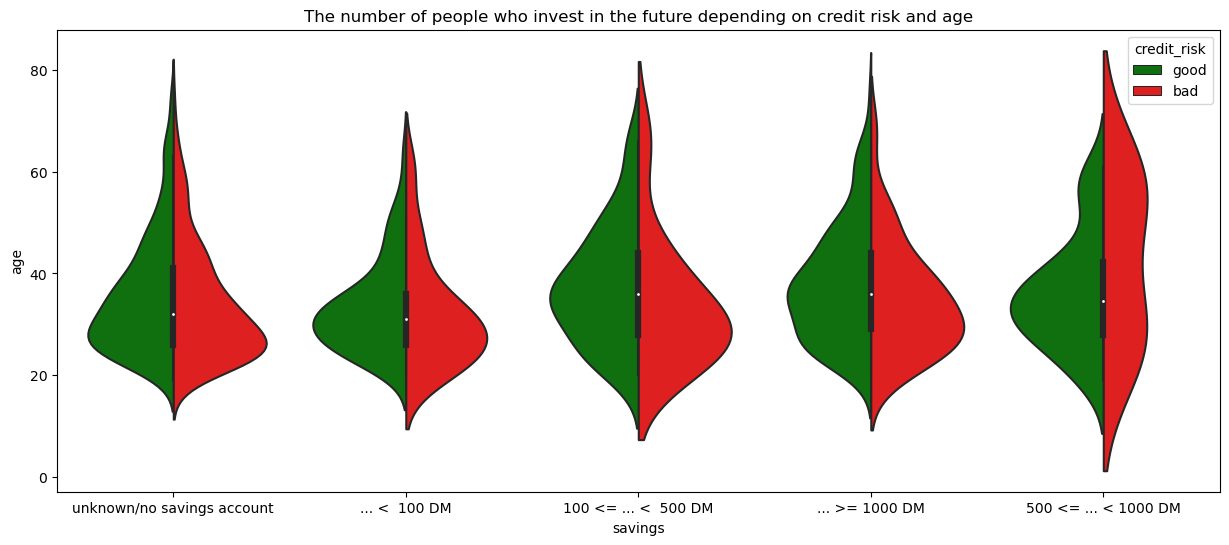

In [149]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk",kind="violin", split=True,
               palette=['green', 'red'])
plt.title('The number of people who invest in the future depending on credit risk and age')
plt.show()

- На графе видна тенденция что больше всего люди откладывают в возрасте от 20 до 40, вне зависимости от кредитного риска

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

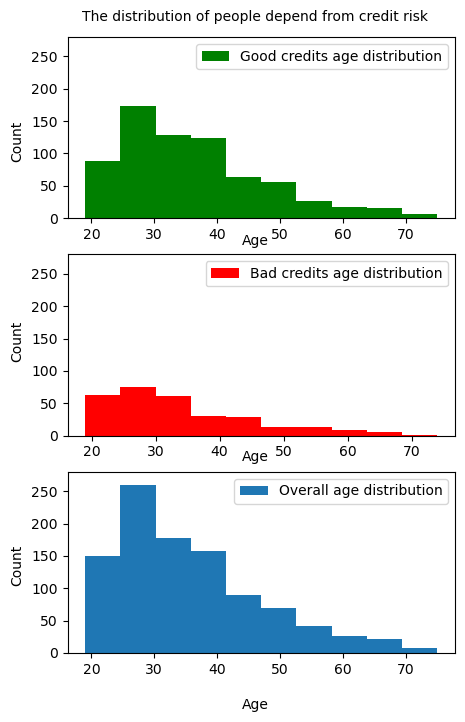

In [150]:
df1=data[data.credit_risk=='good']
df2=data[data.credit_risk=='bad']

fig, axes= plt.subplots(nrows=3, figsize = (5, 8))
plt.figtext(.5,.9,"The distribution of people depend from credit risk", fontsize=10, ha='center')
axes[0].hist(df1['age'], color = 'g', label='Good credits age distribution')
axes[1].hist(df2['age'], color = 'r', label='Bad credits age distribution')
axes[2].hist(data['age'],label='Overall age distribution')
axes[0].legend(loc="upper right")
axes[1].legend(loc="upper right")
axes[2].legend(loc="upper right")
axes[0].set(ylim = (0,280))
axes[1].set(ylim = (0,280))
axes[2].set(ylim = (0,280))
fig.text(0.5, 0.04, 'Age', ha='center')
fig.text(0.5, 0.35, 'Age', ha='center')
fig.text(0.5, 0.62 , 'Age', ha='center')
fig.text(0.01, 0.5, 'Count', va='center', rotation='vertical')
fig.text(0.01, 0.22, 'Count', va='center', rotation='vertical')
fig.text(0.01, 0.75, 'Count', va='center', rotation='vertical')

plt.show()

- Из графа видно что большая часть людей находится в возрасте от 25 до 30

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

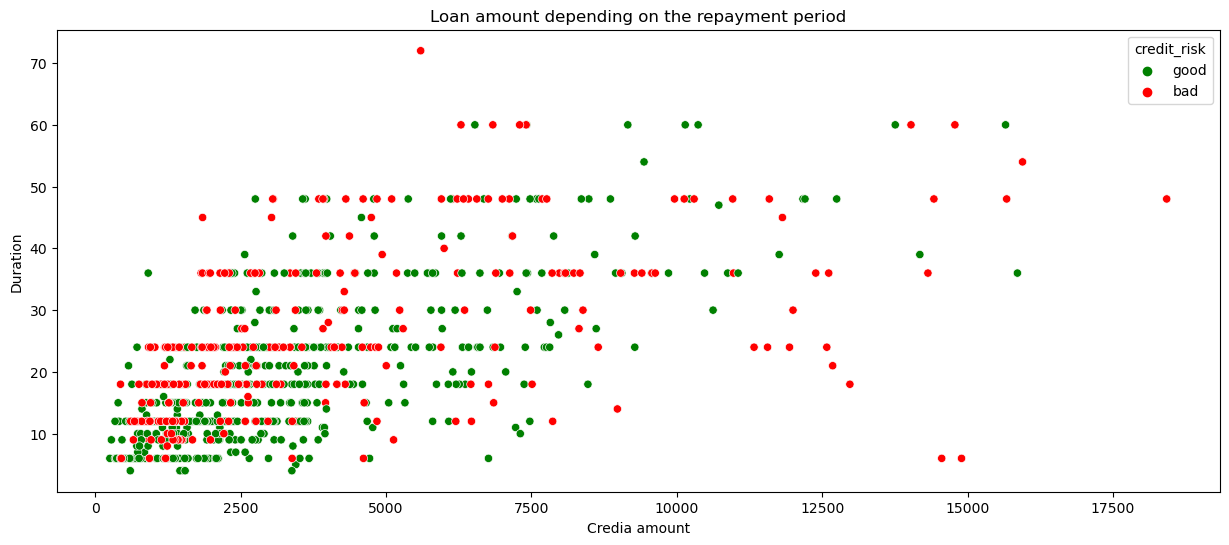

In [151]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data=data, x="amount", y="duration", hue="credit_risk" , palette=['green', 'red'])
plt.xlabel('Credia amount')
plt.ylabel('Duration')
plt.title('Loan amount depending on the repayment period')
plt.show()

- На диаграме видна зависимость, чем большую сумму берет человек, тем на дольший срок. Также видно что люди с плохим кредитным риском стараются брать кредиты на более долгий срок

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

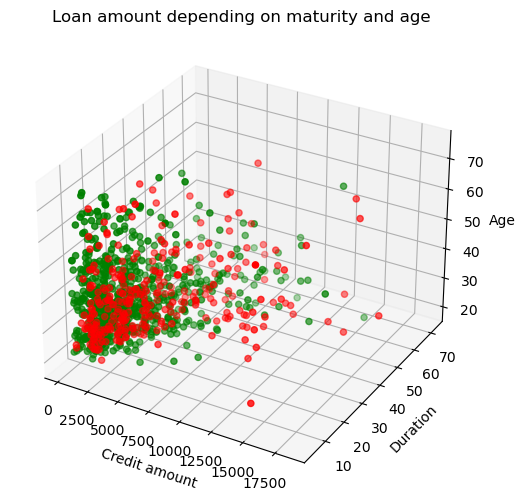

In [152]:
df1=data[data.credit_risk=='good']
df2=data[data.credit_risk=='bad']

plt.figure(figsize=(6,6))
axes = plt.axes(projection='3d')
axes.scatter(df1['amount'], df1['duration'], df1['age'], color = 'g')
axes.scatter(df2['amount'], df2['duration'], df2['age'], color = 'r')
axes.set_xlabel('Credit amount')
axes.set_ylabel('Duration')
axes.set_zlabel('Age')
plt.title('Loan amount depending on maturity and age')
plt.show()

- Из 3D диаграммы вижно что берут в основном маленькие кредиты, на маленький срок, люди возрастом приблизительно от 27 до 40

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

- Удалим столбы с категориальным признаком

In [153]:
import copy
df1=copy.deepcopy(data)
df1=df1.drop(columns=['purpose', 'personal_status_sex', 'other_debtors', 'property',
                      'other_installment_plans','housing'])

- Представим все порядковые и бинарные признаки в виде числовых значений

In [154]:
from sklearn import preprocessing
for (columnName, columnData) in df1.iteritems():
    if isinstance(df1[columnName].iloc[0], str):
        label_encoder = preprocessing.LabelEncoder()
        label_encoder.fit(df1[columnName])
        df1[f"f_{columnName}"]=label_encoder.transform(df1[columnName]).tolist()
        df1=df1.drop(columns=[columnName])

In [155]:
df1

,duration,amount,age,f_status,f_credit_history,f_savings,f_employment_duration,f_installment_rate,f_present_residence,f_number_credits,f_job,f_people_liable,f_telephone,f_foreign_worker,f_credit_risk
0,18,1049,21,3,0,4,2,2,3,0,1,0,0,0,1
1,9,2799,36,3,0,4,0,1,0,1,1,1,0,0,1
2,12,841,23,0,4,0,1,1,3,0,3,0,0,0,1
3,12,2122,39,3,0,4,0,0,0,1,3,1,0,1,1
4,12,2171,38,3,0,4,0,2,3,1,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,21,3,4,4,0,1,3,0,3,1,0,0,0
996,24,2303,45,3,4,4,3,2,2,0,1,0,0,0,0
997,21,12680,30,1,0,1,3,2,3,0,0,0,1,0,0
998,12,6468,52,0,4,1,4,1,2,0,0,0,1,0,0


In [156]:
df1.to_csv('file1.csv', index=False)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

- Целевой переменной является "Кредитный риск", её и будем предсказывать. Удалю столбы которые никак не отнсятся к целевой переменной.

In [157]:
df1=df1.drop(columns=['f_people_liable', 'f_telephone'])

- Буду исходить из суммы параметров, если сумма будет меньше среднего значения с плохим стасуом кредитных рисков, то ответ будет положительным. Посчитаем среднее для всех данных

In [158]:
df2=copy.deepcopy(df1)
ar4=df2.sum(axis = 1).to_list()
df2['metrics']=ar4
df2[['f_credit_risk', 'metrics']].groupby(by="f_credit_risk").mean()

,metrics
f_credit_risk,
0,4010.850000
1,3054.771429


In [159]:
def predict(Xtest: np.array) -> np.array:
    ar=Xtest.sum(axis = 1)
    for i in range(0, len(ar)):
        ar[i] = 1 if ar[i]<4000 else 0
    return(ar)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df1.drop('f_credit_risk', 1).values
y = df1['f_credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение


accuracy_score(y_test, predict(X_test))


/var/folders/pj/d6d294yj48d91tmrgk29qv540000gn/T/ipykernel_64648/1012916821.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df1.drop('f_credit_risk', 1).values


0.62

In [107]:
import random
import matplotlib.pyplot as plt
import math
samplesNum=50
samples=[]
samples0=[]
samples1=[]
for i in range(samplesNum):
    point = [random.randint(0, 100), random.randint(0, 100)]
    samples0.append([point, 0, 0])
for i in range(samplesNum):
    point = [random.randint(60, 160), random.randint(60, 160)]
    samples1.append([point, 1, 0])
samples=samples0+samples1

In [108]:
samples

[[[32, 22], 0, 0],
 [[31, 85], 0, 0],
 [[13, 37], 0, 0],
 [[57, 33], 0, 0],
 [[95, 73], 0, 0],
 [[24, 65], 0, 0],
 [[16, 6], 0, 0],
 [[44, 47], 0, 0],
 [[55, 22], 0, 0],
 [[18, 56], 0, 0],
 [[17, 61], 0, 0],
 [[7, 17], 0, 0],
 [[100, 14], 0, 0],
 [[3, 90], 0, 0],
 [[57, 77], 0, 0],
 [[66, 45], 0, 0],
 [[14, 26], 0, 0],
 [[74, 93], 0, 0],
 [[1, 32], 0, 0],
 [[2, 7], 0, 0],
 [[80, 74], 0, 0],
 [[51, 93], 0, 0],
 [[11, 53], 0, 0],
 [[55, 44], 0, 0],
 [[1, 81], 0, 0],
 [[19, 36], 0, 0],
 [[5, 6], 0, 0],
 [[91, 33], 0, 0],
 [[25, 84], 0, 0],
 [[95, 96], 0, 0],
 [[42, 21], 0, 0],
 [[28, 80], 0, 0],
 [[47, 17], 0, 0],
 [[65, 76], 0, 0],
 [[89, 71], 0, 0],
 [[60, 62], 0, 0],
 [[82, 65], 0, 0],
 [[2, 21], 0, 0],
 [[23, 98], 0, 0],
 [[65, 66], 0, 0],
 [[5, 46], 0, 0],
 [[65, 42], 0, 0],
 [[37, 13], 0, 0],
 [[50, 5], 0, 0],
 [[41, 47], 0, 0],
 [[66, 69], 0, 0],
 [[82, 10], 0, 0],
 [[15, 56], 0, 0],
 [[72, 85], 0, 0],
 [[22, 8], 0, 0],
 [[111, 112], 1, 0],
 [[118, 98], 1, 0],
 [[78, 147], 1, 0],
 